# Module 7 Exercises

In this exercise, you will **analyze networks and visualize the results**. 

**Pay attention to the comments in the code cells and follow them.** 

We will work on the data set with air traffic between airports.


In [1]:
library(dplyr)
library(sp)
library(geosphere)
library(igraph)
library(networkD3)

# flight destinations and counts 
flights <- read.csv("/dsa/data/all_datasets/spatial/flights.csv", as.is=TRUE, header=TRUE)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



**Exercise 1:** **Create a data frame** that only has `airport1`, `airport2`, and the `cnt` attributes.

In [2]:
head(flights)

airline,airport1,airport2,cnt
<chr>,<chr>,<chr>,<int>
AA,DFW,SJU,120
AA,MSP,DFW,326
AA,LGA,ORD,860
AA,TPA,JFK,56
AA,STT,BOS,44
AA,PHX,DFW,550


In [3]:
df <- flights[c(2:4)]
head(df)

airport1,airport2,cnt
<chr>,<chr>,<int>
DFW,SJU,120
MSP,DFW,326
LGA,ORD,860
TPA,JFK,56
STT,BOS,44
PHX,DFW,550


**Exercise 2:** **Create a graph from this data frame**, use directed=FALSE to make it an **undirected** graph. 

In [4]:
gdf <- graph.data.frame(df, directed=FALSE)

**Exercise 3:** Plot the network with igraph's `plot` function with a **force-directed layout**. 

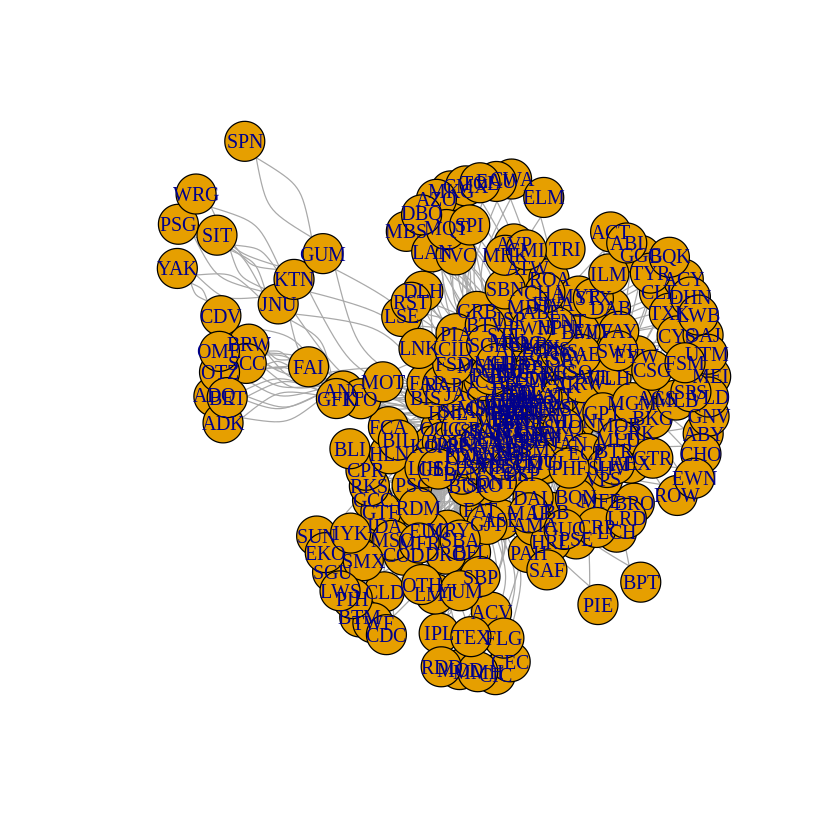

In [5]:
layout1 <- layout.fruchterman.reingold(gdf)
plot(gdf, layout=layout1)

Warning message in if (axes) {:
“the condition has length > 1 and only the first element will be used”

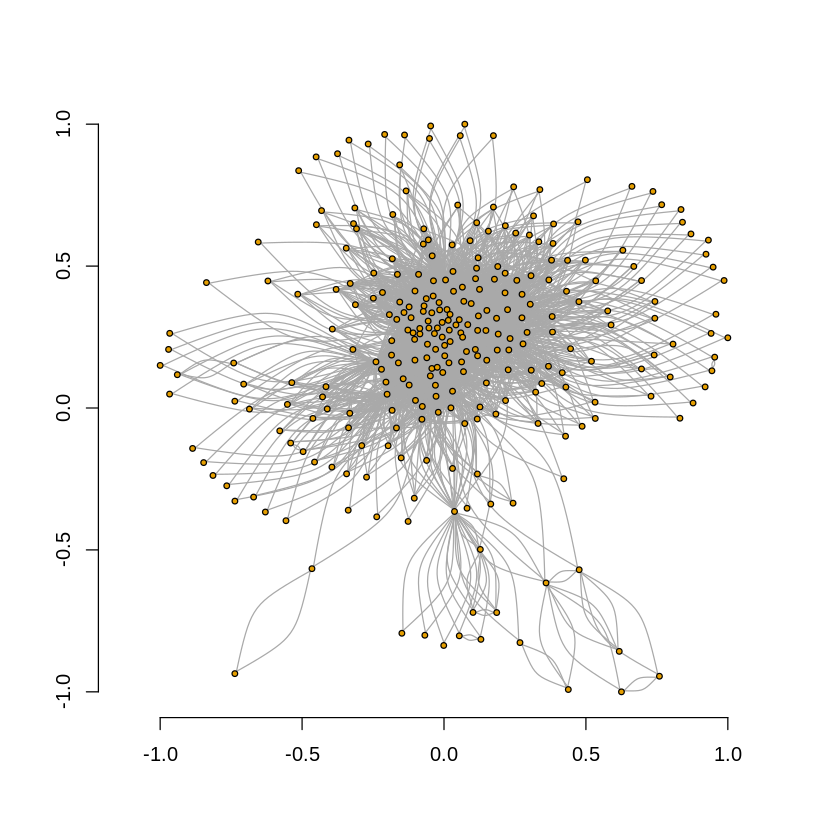

In [6]:
# do a force-directed layout 
layout2 <- layout.fruchterman.reingold(gdf)

# Let's plot this network without labels
# use vertex.size=2 and vertex.label=NA

plot(gdf, layout2, vertex.size=2, vertex.label=NA)

Now, we will **reduce multiple edges** between vertices by adding all their attributes. There are multiple airlines operating between two airports, **we add their flight counts.**

In [7]:
# add the flight counts by using "sum"
gs <- simplify(gdf, edge.attr.comb="sum")

# NORMALIZE the edge weight 
E(gs)$cnt <- E(gs)$cnt/max(E(gs)$cnt)

**Exercise 4:** Plot again, this time, **assign the edge weights to `edge.width` parameter.**

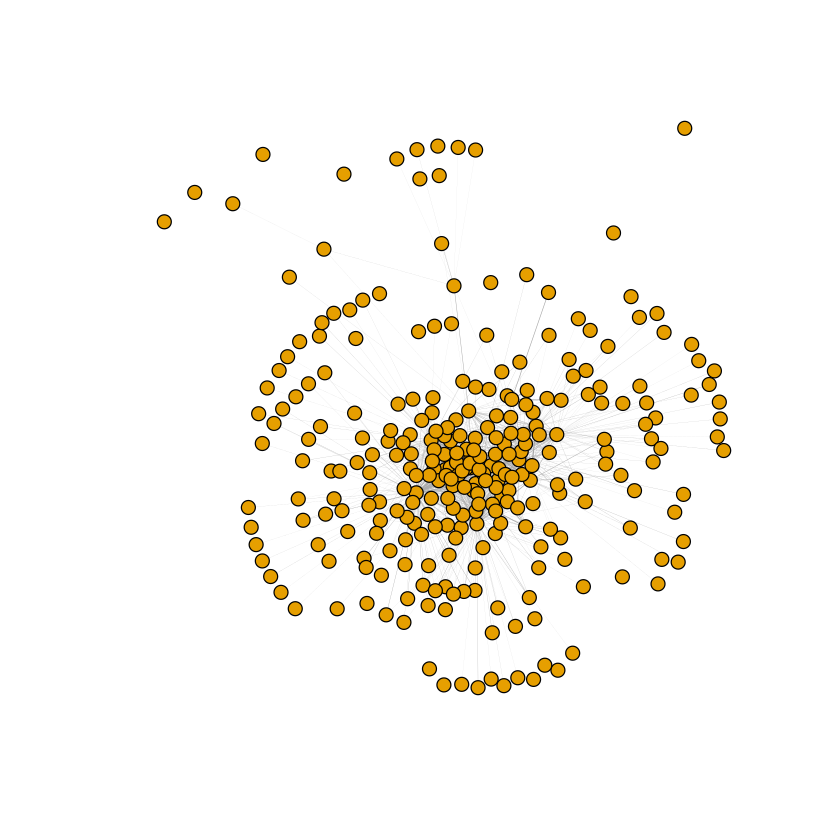

In [8]:
# do a force-directed layout 
layout3 <- layout.fruchterman.reingold(gs)

# draw the network 
plot(gs, layout=layout3, vertex.size=5, vertex.label=NA, edge.width=E(gs)$cnt) # do not forget edge.width=E(gs)$cnt

Now we can see the traffic weighted by the flight counts. Let's change the **size of the vertices by using the traffic**. 


We need to **sum up the weights of all the edges for each vertex**.

In [9]:
# Summing up the edge weights of the adjacent edges for each vertex.
V(gs)$traffic <- strength(gs, mode="all", weights = E(gs)$cnt)


# normalize
V(gs)$traffic <- V(gs)$traffic/max(V(gs)$traffic)

**Exercise 5:** Plot again, this time, **assign the `V(gs)$traffic` to the `vertex.size`. Make sure to multiply it by a value to make the graph look nice.** 

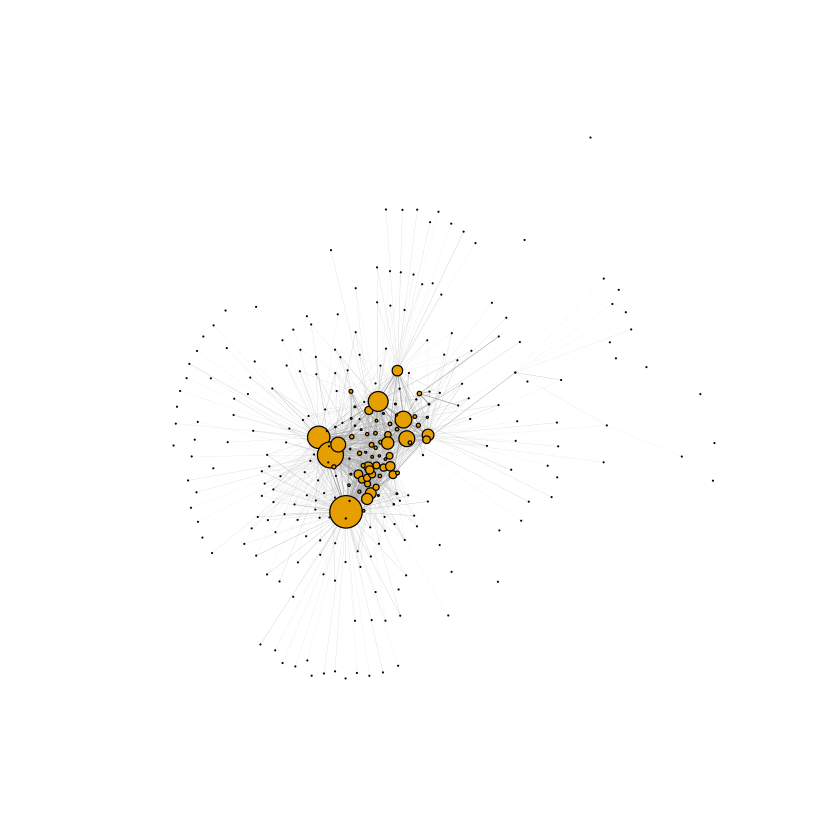

In [10]:
layout4 <- layout.fruchterman.reingold(gs)

# draw the network 
plot(gs, layout=layout4, vertex.size=12*(V(gs)$traffic), vertex.label=NA, edge.width=E(gs)$cnt) # do not forget edge.width=E(gs)$cnt
# do not forget vertex.size= ... and edge.width=...

Now we can see that some airports are busier than others, but we don't know their **names**. Let's find out by **removing the vertex shape** and **leaving the vertex label** and use a **font size proportional to the traffic**.


**Exercise 6:** Plot again, this time: `vertex.shape="none"` and `vertex.label.cex` should be **proportional to traffic.**

Warning message in layout[, 1] + label.dist * cos(-label.degree) * (vertex.size + :
“longer object length is not a multiple of shorter object length”Warning message in layout[, 2] + label.dist * sin(-label.degree) * (vertex.size + :
“longer object length is not a multiple of shorter object length”

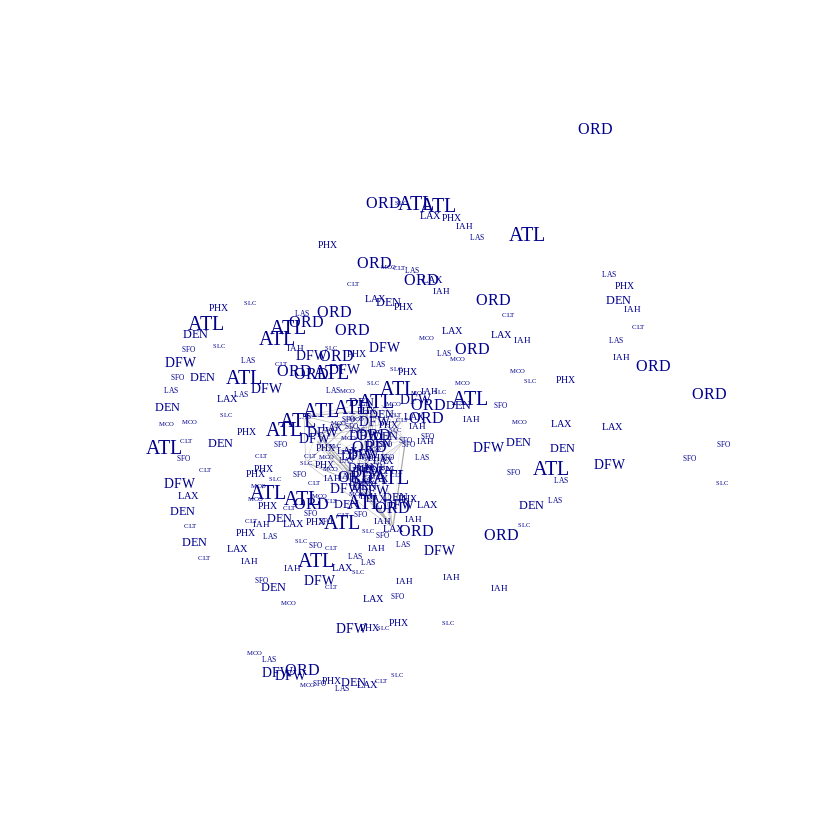

In [23]:
plot(gs, layout=layout4, vertex.size=5*(V(gs)$traffic), vertex.shape="none", edge.width=E(gs)$cnt, vertex.label.cex=(V(gs)$traffic))

Let's **get rid of vertices** that do not have much traffic.

In [12]:
# find them 
dv <- V(gs)$traffic < 0.3

#delete them 
gs <- delete_vertices(gs, V(gs)[dv])

**Exercise 7:** Plot again, this time use a **vertex size and label font proportional to traffic** and make sure to make it look nice. 

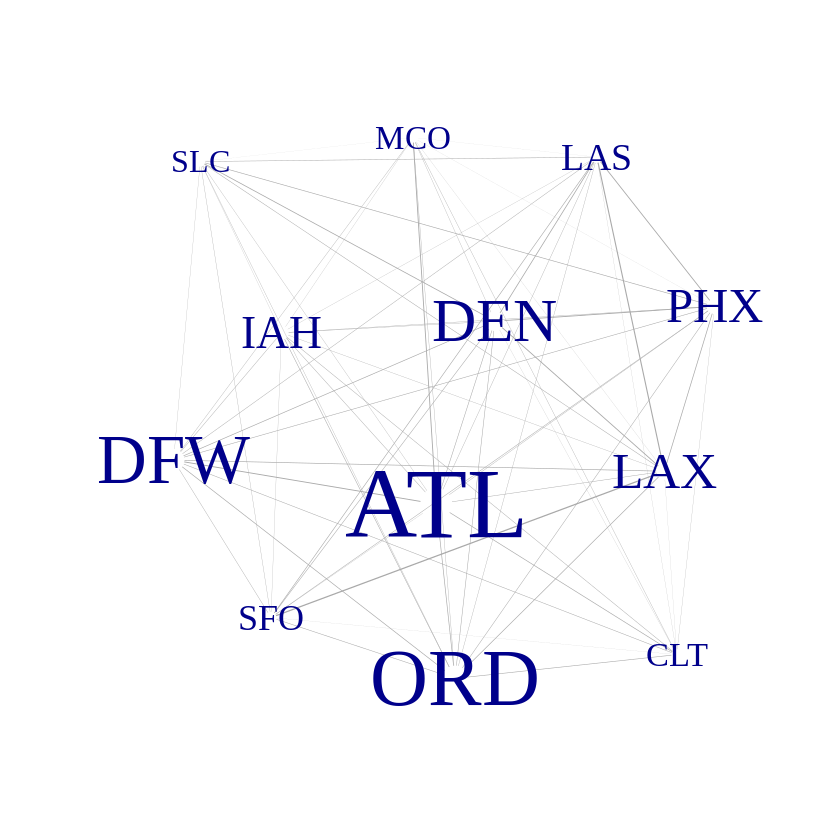

In [16]:

plot(gs, layout=layout.fruchterman.reingold(gs), vertex.size=12*(V(gs)$traffic), vertex.shape="none", edge.width=E(gs)$cnt,
    vertex.label.cex=5*(V(gs)$traffic))

# do not forget vertex.label.cex, vertex.size and edge.width